In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# seems like seed doesn't affect anything, same results no matter what?
# maybe just caching? because it does seem like results change when the whole
# notebook reloads
np.random.seed(23)

# Load the dataset
news = pd.read_csv('/content/Truth_Seeker_Model_Dataset.csv')
news = news.dropna()
news.head()







,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree


In [ ]:
#only keep data points where the consensus for either the 3 label or 5 label was
#that the tweet agreed with the statement that was labeled true/false

#mask_3_label = news['3_label_majority_answer'] == 'Agree'
#mask_5_label = (news['5_label_majority_answer'] == 'Agree') | (news['5_label_majority_answer'] == 'Mostly Agree')

#news = news[mask_3_label | mask_5_label]

#news.head()

In [ ]:
#separate true and fake news
truenews = news[news['target'] == True]
fakenews = news[news['target'] == False]
print(len(truenews))
print(len(fakenews))

68930
65268


In [ ]:
fakenews.head()

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
46956,46956,Ciara O'Rourke,Says the COVID-19 vaccine doesnt prevent catch...,False,0.0,"vaccine,spreading, not prevent","@R05812243 @washingtonpost Enlighten us, how a...",Agree,Agree
46957,46957,Ciara O'Rourke,Says the COVID-19 vaccine doesnt prevent catch...,False,0.0,"vaccine,spreading, not prevent",@Burkles1 It is a fact and 100% true that:\n\n...,NO MAJORITY,Agree
46958,46958,Ciara O'Rourke,Says the COVID-19 vaccine doesnt prevent catch...,False,0.0,"vaccine,spreading, not prevent",@ShekharGupta With a vaccine that does not pre...,NO MAJORITY,Agree
46959,46959,Ciara O'Rourke,Says the COVID-19 vaccine doesnt prevent catch...,False,0.0,"vaccine,spreading, not prevent",@rmlubash @shawver_richard @TheBrandonMorse Th...,NO MAJORITY,Agree
46960,46960,Ciara O'Rourke,Says the COVID-19 vaccine doesnt prevent catch...,False,0.0,"vaccine,spreading, not prevent",@Rob_Melbo @jaydee911997 @JimWils92190042 @cle...,Agree,Agree


In [ ]:
fakenews.describe()

,Unnamed: 0,BinaryNumTarget
count,65268.000000,65268.0
mean,96878.981109,0.0
std,25426.406926,0.0
min,46956.000000,0.0
25%,80679.750000,0.0
50%,101563.500000,0.0
75%,117880.250000,0.0
max,134197.000000,0.0


In [ ]:
truenews.head()

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree


In [ ]:
truenews.describe()

,Unnamed: 0,BinaryNumTarget
count,68930.000000,68930.0
mean,38900.147454,1.0
std,25975.817079,0.0
min,0.000000,1.0
25%,17232.250000,1.0
50%,34464.500000,1.0
75%,62434.750000,1.0
max,94386.000000,1.0


In [ ]:
news.sample(frac = 1) #Shuffle 100%

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
92187,92187,Caryn Shinske,"New Jersey has ""the highest property taxes in ...",True,1.0,"New Jersey, highest property taxes",@Lazer11111 @ktny @DanScavino @realDonaldTrump...,Mostly Agree,Agree
55081,55081,Emily Tian,Sudden Infant Death Syndrome is absolutely a s...,False,0.0,"Sudden Infant Death Syndrome, vaccine",@jzhawk13 @theresnotime @ReggieBush Vaccines a...,NO MAJORITY,Agree
60196,60196,Linda Qiu,The No. 1 cause of death for African-American ...,True,1.0,"African-American males, murder",@CNNnewsroom My serious condolences to the fam...,Agree,Agree
93897,93897,Eric Stirgus,Sixteen million jobs were created under Ronald...,True,1.0,"16 million, jobs, created, Reagan",@themuzza60 I think you are looking in the mir...,Mostly Agree,Agree
3625,3625,Louis Jacobson,There is racism physically built into some of ...,True,1.0,"racism,highways","@News24 ANC racism &amp; corruption have ""tran...",Mostly Agree,Agree
...,...,...,...,...,...,...,...,...,...
9704,9704,Shefali Luthra,Republicans have shown themselves willing to c...,True,1.0,"Republicans, cut, health insurance",@realDonaldTrump @DeanHeller voted 2 repeal th...,NO MAJORITY,Agree
76726,76726,Ciara O'Rourke,Says Bruno Mars is Michael Jacksons son.,False,0.0,"Bruno Mars, Michael Jackson, son",As long as we're clear that Bruno Mars is Mich...,Agree,Agree
9256,9256,Shefali Luthra,Republicans have shown themselves willing to c...,True,1.0,"Republicans, cut, health insurance",@GOPLeader In the last six months I received a...,Agree,Agree
127718,127718,Laura Schulte,Says Joe Biden is absolutely on board with def...,False,0.0,"Biden, on board, defunding, police",@anj_x101 @marwilliamson @JoeBiden Thats what ...,Mostly Agree,Agree


In [ ]:
import nltk



In [ ]:
# Function to filter words based on the English dictionary
def filter_english_words(article):
    #return ' '.join([word.lower() for word in article.split() if word.lower() in english_word_set and word.lower() not in set(stopwords.words('english'))])
    return ' '.join([word.lower() for word in article.split() if word.lower() in english_word_set])

In [ ]:
nltk.download('words')

from nltk.corpus import words

# Your array of text
article_array = news["tweet"]

# Set of English words
english_word_set = set(words.words())

# Apply the filter to each article in the array
filtered_articles = [filter_english_words(article) for article in article_array]

# Update the original array with the filtered results
news['Clean Text'] = filtered_articles

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
list(news['Clean Text'])[30]
news.head()

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer,Clean Text
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree,month update delta covid for in arming the bor...
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree,not as many people are literally and out in th...
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree,the supreme court is siding with super rich pr...
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree,broken campaign delta without abandoned armed ...
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree,i the confluence of right now is unprecedented...


In [ ]:
# Split the data into features (X) and labels (y)
X = news['Clean Text']  # Assuming 'text_column' contains the news text
y = news['target']  # Assuming 'label_column' contains the labels (fake or real)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert text data to a bag-of-words representation
#bow_transformer = CountVectorizer(analyzer=process_text).fit(news['Clean Text'])
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
print(X_train)

26587                          radical are and defend since
36010     each of drug overdose were probably covid need...
80031     looking forward to a forensic audit of the mic...
130086    of people opposed to critical race theory dont...
54842     the mob mike a metropolitan police officer who...
                                ...                        
110268    you are very there was massive voter and elect...
119879    by illegal alien radical leftist the sure as h...
103694    are not the only way to reach according to dis...
131932    against the united the new world and all of us...
121958    the quote is the entire city is ablaze all the...
Name: Clean Text, Length: 107358, dtype: object


In [ ]:
print(list(vectorizer.vocabulary_.items())[-10:])

[('catty', 2103), ('syncytial', 14051), ('bronchiolitis', 1744), ('neuronal', 9305), ('complicate', 2716), ('bayonet', 1158), ('troublemaker', 14779), ('pounced', 10654), ('pothead', 10649), ('downside', 4288)]


In [ ]:
#print(len(bow_transformer.vocabulary_)) #Total vocab words
print(len(vectorizer.vocabulary_))

16287


In [ ]:
#news_bow = bow_transformer.transform(news['Clean Text'])

In [ ]:
# Create and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

In [ ]:
# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8846870342771982
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.88      0.88     13076
        True       0.89      0.89      0.89     13764

    accuracy                           0.88     26840
   macro avg       0.88      0.88      0.88     26840
weighted avg       0.88      0.88      0.88     26840

Confusion Matrix:
 [[11513  1563]
 [ 1532 12232]]


In [ ]:
class_names = nb_classifier.classes_


In [ ]:

# Extract feature names from the vectorizer
#feature_names = np.array(bow_transformer.get_feature_names_out())
feature_names = np.array(vectorizer.get_feature_names_out())



# Get the log probabilities for each class (assuming MultinomialNB)
class_probabilities = nb_classifier.feature_log_prob_

# Calculate the feature importance scores
feature_importances = class_probabilities[1] - class_probabilities[0]

# Get indices of the top words associated with true news
top_fake_indices = feature_importances.argsort()[:100]

# Get indices of the top words associated with fake news
top_true_indices = feature_importances.argsort()[-100:][::-1]

# Get the corresponding words
top_true_words = feature_names[top_true_indices]
top_fake_words = feature_names[top_fake_indices]

In [ ]:
# Print the top words associated with true news
print("Top words associated with true news:")
print(top_true_words)

# Print the top words associated with fake news
print("\nTop words associated with fake news:")
print(top_fake_words)

Top words associated with true news:
['birthright' 'buffet' 'lobster' 'uninsured' 'eminent' 'frisk' 'potent'
 'espionage' 'wedlock' 'graduating' 'evenly' 'marijuana' 'mongrel'
 'eviction' 'risen' 'rick' 'marco' 'recreational' 'gunfire' 'prohibition'
 'cultivation' 'tuition' 'heroin' 'obesity' 'spectrum' 'recruiting'
 'domain' 'maternal' 'background' 'clearance' 'perry' 'poverty' 'subhuman'
 'decreasing' 'ken' 'tourism' 'smoked' 'protectionism' 'jersey'
 'thumbprint' 'marriage' 'indictment' 'opium' 'alligator' 'medicinal'
 'unpopular' 'golf' 'sandy' 'rainy' 'convalescent' 'steak' 'solar'
 'warren' 'foster' 'podesta' 'specter' 'maternity' 'solicitation'
 'legalization' 'sanger' 'blindness' 'median' 'graduation' 'automobile'
 'hemp' 'societal' 'wages' 'agricultural' 'memorial' 'smoker' 'deficit'
 'veto' 'installation' 'historically' 'enthusiast' 'inequality' 'blunt'
 'pollution' 'annexation' 'elective' 'highest' 'transportation' 'warner'
 'rio' 'coal' 'snap' 'plasma' 'carter' 'rescue' 'il

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Get sentiment scores for each word
sentiment_scores_true = {word: sid.polarity_scores(word)['compound'] for word in top_true_words}
sentiment_scores_fake = {word: sid.polarity_scores(word)['compound'] for word in top_fake_words}

# Print sentiment scores
for word, score in sentiment_scores_true.items():
    print(f"{word}: {score}")



birthright: 0.0
buffet: 0.0
lobster: 0.0
uninsured: 0.0
eminent: 0.0
frisk: 0.0
potent: 0.0
espionage: 0.0
wedlock: 0.0
graduating: 0.0
evenly: 0.0
marijuana: 0.0
mongrel: 0.0
eviction: -0.4588
risen: 0.0
rick: 0.0
marco: 0.0
recreational: 0.0
gunfire: 0.0
prohibition: 0.0
cultivation: 0.0
tuition: 0.0
heroin: -0.4939
obesity: 0.0
spectrum: 0.0
recruiting: 0.0
domain: 0.0
maternal: 0.0
background: 0.0
clearance: 0.0
perry: 0.0
poverty: -0.5106
subhuman: 0.0
decreasing: 0.0
ken: 0.0
tourism: 0.0
smoked: 0.0
protectionism: 0.0
jersey: 0.0
thumbprint: 0.0
marriage: 0.0
indictment: 0.0
opium: 0.0
alligator: 0.0
medicinal: 0.0
unpopular: 0.0
golf: 0.0
sandy: 0.0
rainy: -0.0772
convalescent: 0.0
steak: 0.0
solar: 0.0
warren: 0.0
foster: 0.0
podesta: 0.0
specter: 0.0
maternity: 0.0
solicitation: 0.0
legalization: 0.0
sanger: 0.0
blindness: 0.0
median: 0.0
graduation: 0.0
automobile: 0.0
hemp: 0.0
societal: 0.0
wages: 0.0
agricultural: 0.0
memorial: 0.0
smoker: 0.0
deficit: -0.4019
veto: 0.0
i

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Print sentiment scores
for word, score in sentiment_scores_fake.items():
    print(f"{word}: {score}")



hank: 0.0
forensic: 0.0
babbitt: 0.0
zombie: 0.0
sharpie: 0.0
herd: 0.0
cage: 0.0
certify: 0.0
exotic: 0.0
beau: 0.0
recount: 0.0
knife: 0.0
aluminum: 0.0
defenseless: -0.34
cain: 0.0
protein: 0.0
audit: 0.0
apocalypse: 0.0
macron: 0.0
rounded: 0.0
oxide: 0.0
virologist: 0.0
signature: 0.0
cube: 0.0
toxicology: 0.0
mayhem: 0.0
blake: 0.0
rover: 0.0
legend: 0.0
interrupt: -0.34
aes: 0.0
dregs: 0.0
asymptomatic: 0.0
transmit: 0.0
ruth: 0.0
slur: 0.0
disintegrate: 0.0
spangler: 0.0
coca: 0.0
trailer: 0.0
vaccination: 0.0
usable: 0.0
basement: 0.0
ablaze: 0.0
inflate: 0.0
transmission: 0.0
variant: 0.0
storming: 0.0
cloture: 0.0
banner: 0.0
massacrer: 0.0
omicron: 0.0
rig: -0.128
vaccine: 0.0
survival: 0.0
certification: 0.0
walled: 0.0
jabbed: 0.0
urine: 0.0
immunity: 0.0
declaration: 0.0
assassination: -0.5994
anonymous: 0.0
survivability: 0.0
devalue: 0.0
transmissible: 0.0
planetary: 0.0
colon: 0.0
sergeant: 0.0
placebo: 0.0
jerry: 0.0
gene: 0.0
hassle: 0.0
escape: 0.1779
cola: 0.0
dea

In [ ]:
non_zero_true_count = 0
non_zero_fake_count = 0

# Count non-zero scores for true words
for score in sentiment_scores_true.values():
    if score != 0:
        non_zero_true_count += 1

# Count non-zero scores for fake words
for score in sentiment_scores_fake.values():
    if score != 0:
        non_zero_fake_count += 1

# Print the counts
print("Non-zero scores for true words:", non_zero_true_count)
print("Non-zero scores for fake words:", non_zero_fake_count)

Non-zero scores for true words: 7
Non-zero scores for fake words: 7


In [ ]:
sentiment_scores_true_df = pd.DataFrame(dict(word = sentiment_scores_true.keys(), score = sentiment_scores_true.values(), fake = False))
sentiment_scores_fake_df = pd.DataFrame(dict(word = sentiment_scores_fake.keys(), score = sentiment_scores_fake.values(), fake = True))
sentiment_scores_df_long = pd.concat([sentiment_scores_true_df, sentiment_scores_fake_df])
sentiment_scores_df_long.to_csv("twitter_sentiment_scores_df_long.csv")

sentiment_scores_df_wide = pd.DataFrame(dict(true_word = sentiment_scores_true.keys(), true_score = sentiment_scores_true.values(), fake_word = sentiment_scores_fake.keys(), fake_score = sentiment_scores_fake.values()))
sentiment_scores_df_wide.to_csv("twitter_sentiment_scores_df_wide.csv")

In [ ]:
non_zero_count = sum(1 for word, score in sentiment_scores_true.items() if score != 0)
true_positive_sentiment_count = sum(1 for word, score in sentiment_scores_true.items() if score > 0)
true_negative_sentiment_count = sum(1 for word, score in sentiment_scores_true.items() if score < 0)

print(f"Number of true feature words with positive sentiment score: {true_positive_sentiment_count}")
print(f"Number of true feature words with negative sentiment score: {true_negative_sentiment_count}")

print(f"Number of true feature words with a non-zero sentiment score: {non_zero_count}")

non_zero_count = sum(1 for word, score in sentiment_scores_fake.items() if score != 0)
fake_positive_sentiment_count = sum(1 for word, score in sentiment_scores_fake.items() if score > 0)
fake_negative_sentiment_count = sum(1 for word, score in sentiment_scores_fake.items() if score < 0)

print(f"Number of fake feature words with positive sentiment score: {fake_positive_sentiment_count}")
print(f"Number of fake feature words with negative sentiment score: {fake_negative_sentiment_count}")
print(f"Number of fake feature words with a non-zero sentiment score: {non_zero_count}")

Number of true feature words with positive sentiment score: 2
Number of true feature words with negative sentiment score: 5
Number of true feature words with a non-zero sentiment score: 7
Number of fake feature words with positive sentiment score: 1
Number of fake feature words with negative sentiment score: 6
Number of fake feature words with a non-zero sentiment score: 7


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



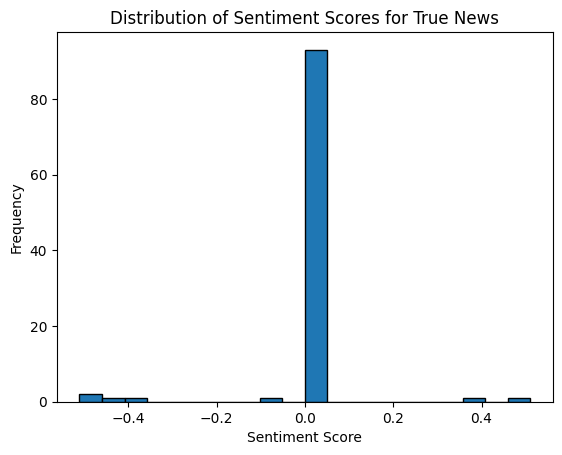

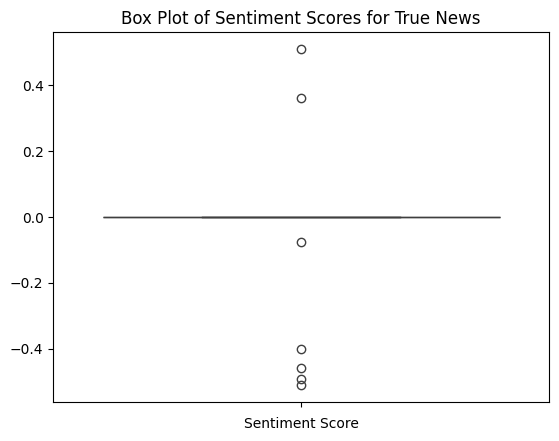

Statistics for Sentiment Scores of True News
Mean: -0.010706000000000002
Median: 0.0
Standard Deviation: 0.11235419068285793




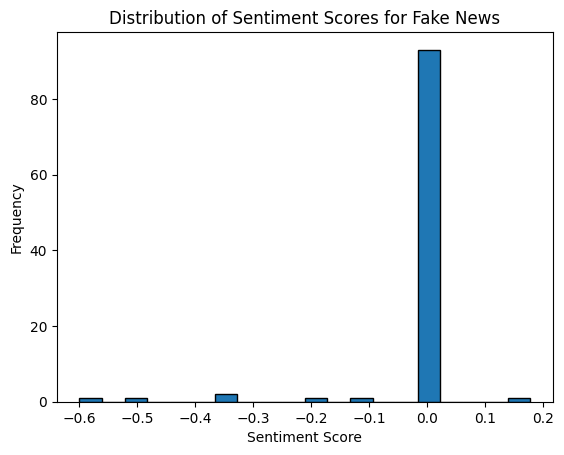

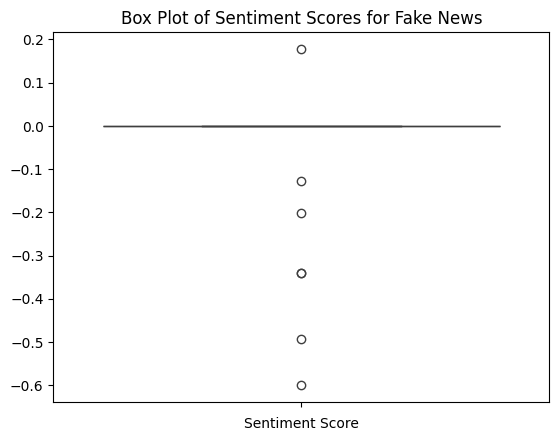

Statistics for Sentiment Scores of Fake News
Mean: -0.019257000000000003
Median: 0.0
Standard Deviation: 0.09414308604990598




In [ ]:
def calculate_and_plot_statistics(sentiment_scores, title):
    # Descriptive Statistics
    mean_score = np.mean(list(sentiment_scores.values()))
    median_score = np.median(list(sentiment_scores.values()))
    std_dev = np.std(list(sentiment_scores.values()))

    # Histogram
    plt.hist(list(sentiment_scores.values()), bins=20, edgecolor='black')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sentiment Scores for {title}')
    plt.show()

    # Box Plot
    sns.boxplot(list(sentiment_scores.values()))
    plt.xlabel('Sentiment Score')
    plt.title(f'Box Plot of Sentiment Scores for {title}')
    plt.show()

    # Print Statistics
    print(f"Statistics for Sentiment Scores of {title}")
    print(f"Mean: {mean_score}")
    print(f"Median: {median_score}")
    print(f"Standard Deviation: {std_dev}")
    print("\n")

# Calculate and plot for true news
calculate_and_plot_statistics(sentiment_scores_true, "True News")

# Calculate and plot for fake news
calculate_and_plot_statistics(sentiment_scores_fake, "Fake News")


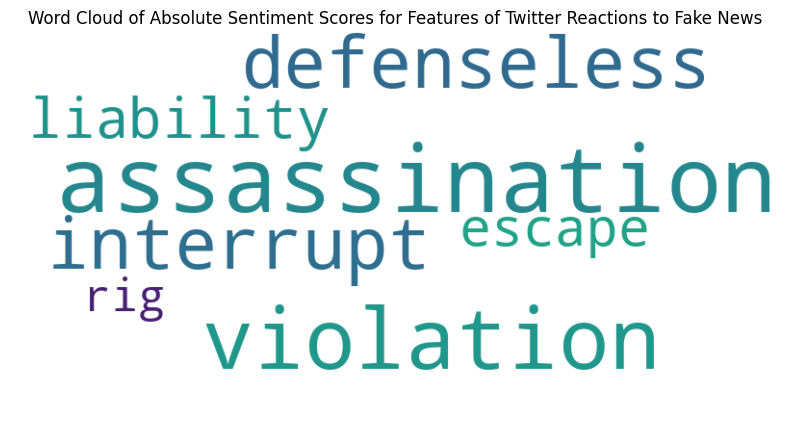

In [ ]:
from wordcloud import WordCloud

# Assuming sentiment_scores_true and sentiment_scores_fake are dictionaries with words as keys and sentiment scores as values

# Function to generate and plot word cloud with absolute values of sentiment scores
def generate_and_plot_wordcloud_absolute(sentiment_scores, title):
    # Calculate absolute values of sentiment scores
    sentiment_scores_absolute = {word: abs(score) for word, score in sentiment_scores.items()}

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sentiment_scores_absolute)

    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Absolute Sentiment Scores for Features of Twitter Reactions to {title}')
    plt.show()

# Generate and plot word cloud for fake news with absolute sentiment scores
generate_and_plot_wordcloud_absolute(sentiment_scores_fake, "Fake News")


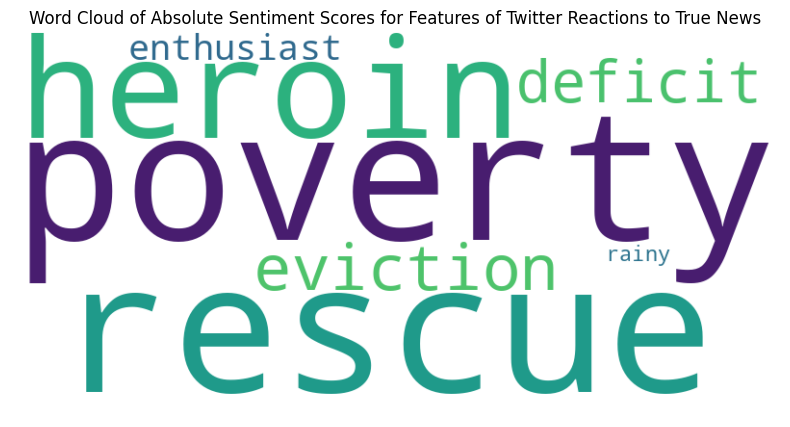

In [ ]:
# Generate and plot word cloud for fake news with absolute sentiment scores
generate_and_plot_wordcloud_absolute(sentiment_scores_true, "True News")

In [ ]:
#assessing emotion of top words

# Access the NRC Emotion Lexicon
lexicon = pd.read_csv('/content/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', names=["word", "emotion", "value"], sep='\t', keep_default_na=False)

def get_emotions(word):
    # Check if the word is in the 'word' column of the lexicon
    if word in lexicon['word'].values:
        # Filter the DataFrame to get emotions where 'value' is 1
        emotions = list(lexicon.loc[lexicon['word'] == word, 'emotion'][lexicon['value'] == 1])
        return emotions
    else:
        return []

def analyze_word_list(word_list):
    word_emotions = {}
    for word in word_list:
        emotions = get_emotions(word)
        if emotions:
            word_emotions[word] = emotions
    return word_emotions

# Analyze emotions for true words
true_word_emotions = analyze_word_list(top_true_words)
print("Emotions for true words:", true_word_emotions)

# Analyze emotions for fake words
fake_word_emotions = analyze_word_list(top_fake_words)
print("Emotions for fake words:", fake_word_emotions)

Emotions for true words: {'buffet': ['anger', 'negative'], 'eminent': ['positive'], 'espionage': ['negative'], 'eviction': ['anger', 'disgust', 'fear', 'negative', 'sadness'], 'recreational': ['anticipation', 'joy', 'positive'], 'prohibition': ['negative'], 'cultivation': ['positive'], 'heroin': ['negative'], 'obesity': ['disgust', 'negative', 'sadness'], 'maternal': ['anticipation', 'negative', 'positive'], 'clearance': ['positive', 'trust'], 'poverty': ['anger', 'disgust', 'fear', 'negative', 'sadness'], 'ken': ['positive'], 'marriage': ['anticipation', 'joy', 'positive', 'trust'], 'indictment': ['fear', 'negative'], 'opium': ['anger', 'disgust', 'fear', 'negative', 'sadness'], 'unpopular': ['disgust', 'negative', 'sadness'], 'rainy': ['sadness'], 'specter': ['fear', 'negative', 'sadness'], 'blindness': ['negative', 'sadness'], 'graduation': ['anticipation', 'fear', 'joy', 'positive', 'surprise', 'trust'], 'wages': ['joy', 'positive'], 'smoker': ['negative'], 'deficit': ['negative'],

In [ ]:
# Count the number of words in true_word_emotions with any emotion
num_true_words_with_emotion = sum(1 for emotions in true_word_emotions.values() if emotions)

# Count the number of words in fake_word_emotions with any emotion
num_fake_words_with_emotion = sum(1 for emotions in fake_word_emotions.values() if emotions)

print("Number of true words with emotion:", num_true_words_with_emotion)
print("Number of fake words with emotion:", num_fake_words_with_emotion)

Number of true words with emotion: 35
Number of fake words with emotion: 23


In [ ]:
from collections import Counter

# Function to count the number of words for each emotion
def count_emotions(word_emotions):
    emotion_counts = Counter(emotion for emotions in word_emotions.values() for emotion in emotions)
    return emotion_counts

# Count emotions for true words
true_emotion_counts = count_emotions(true_word_emotions)

# Count emotions for fake words
fake_emotion_counts = count_emotions(fake_word_emotions)

# Print the results
print("Emotion counts for true words:", true_emotion_counts)
print("Emotion counts for fake words:", fake_emotion_counts)

Emotion counts for true words: Counter({'negative': 22, 'positive': 14, 'fear': 9, 'sadness': 9, 'disgust': 8, 'anger': 7, 'anticipation': 7, 'joy': 7, 'trust': 4, 'surprise': 4})
Emotion counts for fake words: Counter({'negative': 13, 'fear': 7, 'anger': 7, 'sadness': 6, 'positive': 6, 'trust': 4, 'surprise': 2, 'disgust': 2, 'anticipation': 1})


In [ ]:
# display emotions of each word
from tabulate import tabulate

# Convert dictionaries to lists of lists for tabulation
true_table_data = [(word, ', '.join(emotions)) for word, emotions in true_word_emotions.items()]
fake_table_data = [(word, ', '.join(emotions)) for word, emotions in fake_word_emotions.items()]

# Create tables using tabulate
true_table = tabulate(true_table_data, headers=['Word', 'Emotions'], tablefmt='grid', numalign="center")
fake_table = tabulate(fake_table_data, headers=['Word', 'Emotions'], tablefmt='grid', numalign="center")

# Print or display the tables
print("True Word Emotions:")
print(true_table)

print("\nFake Word Emotions:")
print(fake_table)

True Word Emotions:
+--------------+-------------------------------------------------------+
| Word         | Emotions                                              |
+==============+=======================================================+
| buffet       | anger, negative                                       |
+--------------+-------------------------------------------------------+
| eminent      | positive                                              |
+--------------+-------------------------------------------------------+
| espionage    | negative                                              |
+--------------+-------------------------------------------------------+
| eviction     | anger, disgust, fear, negative, sadness               |
+--------------+-------------------------------------------------------+
| recreational | anticipation, joy, positive                           |
+--------------+-------------------------------------------------------+
| prohibition  | negative      

In [ ]:
# count up each emotion

from collections import Counter

# Function to count emotions for a given dictionary
def count_emotions(word_emotions):
    all_emotions = [emotion for emotions in word_emotions.values() for emotion in emotions]
    return Counter(all_emotions)

# Count emotions for true_word_emotions
true_emotion_counts = count_emotions(true_word_emotions)
print("Emotion Counts for True Words:", true_emotion_counts)

# Sum up all the numbers (values) in the dictionary
total_count = sum(true_emotion_counts.values())

print("Total Emotion Count for True Words:", total_count)


# Count emotions for fake_word_emotions
fake_emotion_counts = count_emotions(fake_word_emotions)
print("Emotion Counts for Fake Words:", fake_emotion_counts)

# Sum up all the numbers (values) in the dictionary
total_count = sum(fake_emotion_counts.values())

print("Total Emotion Count for Fake Words:", total_count)

Emotion Counts for True Words: Counter({'negative': 22, 'positive': 14, 'fear': 9, 'sadness': 9, 'disgust': 8, 'anger': 7, 'anticipation': 7, 'joy': 7, 'trust': 4, 'surprise': 4})
Total Emotion Count for True Words: 91
Emotion Counts for Fake Words: Counter({'negative': 13, 'fear': 7, 'anger': 7, 'sadness': 6, 'positive': 6, 'trust': 4, 'surprise': 2, 'disgust': 2, 'anticipation': 1})
Total Emotion Count for Fake Words: 48


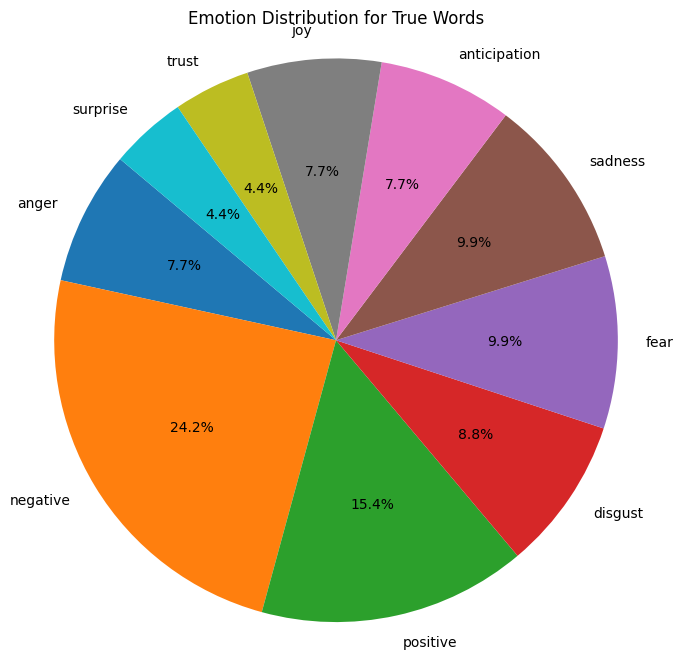

In [ ]:

# Extract data for the pie chart
labels_true = true_emotion_counts.keys()
sizes_true = true_emotion_counts.values()

# Create a pie chart for true word emotions
plt.figure(figsize=(8, 8))
plt.pie(sizes_true, labels=labels_true, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution for True Words')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()

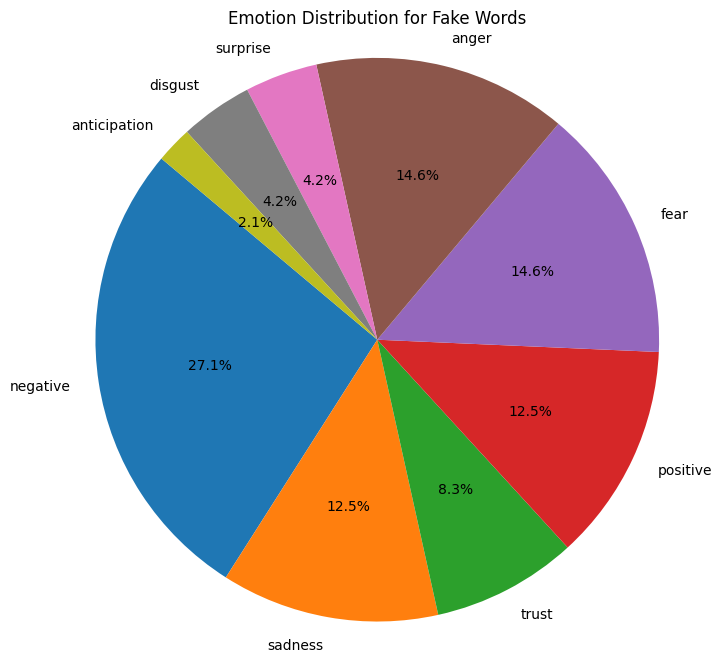

In [ ]:
# Extract data for the pie chart
labels_true = fake_emotion_counts.keys()
sizes_true = fake_emotion_counts.values()

# Create a pie chart for true word emotions
plt.figure(figsize=(8, 8))
plt.pie(sizes_true, labels=labels_true, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution for Fake Words')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()

In [ ]:
import math
n = 100

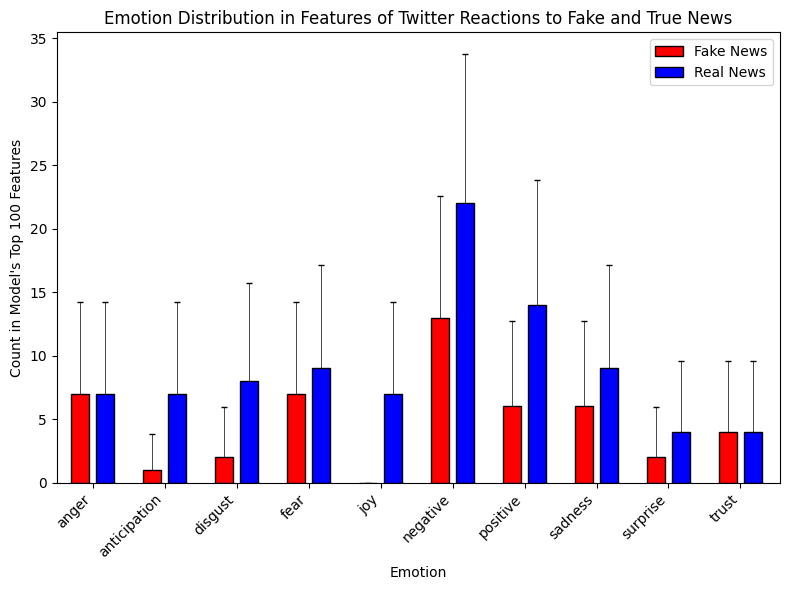

In [ ]:


# Get a list of all unique emotions
all_emotions = set(fake_emotion_counts.keys()).union(set(true_emotion_counts.keys()))

# Sort the emotions alphabetically for consistent ordering
all_emotions = sorted(all_emotions)

# Create lists of counts for fake and true news, filling with zeros for missing emotions
fake_counts_list = [fake_emotion_counts.get(emotion, 0) for emotion in all_emotions]
true_counts_list = [true_emotion_counts.get(emotion, 0) for emotion in all_emotions]

fake_errors = []
true_errors = []
for i in range(len(all_emotions)):
  p_t = true_counts_list[i]/n
  p_f = fake_counts_list[i]/n
  s_t = math.sqrt((2* n*(1-p_t) * p_t)/(n-1))
  s_f = math.sqrt((2* n*(1-p_f) * p_f)/(n-1))
  fake_errors.append(2 * n * (s_f/math.sqrt(n)))
  true_errors.append(2 * n * (s_t/math.sqrt(n)))

emotion_data_df_long1 = pd.DataFrame(dict(emotion = all_emotions, count = fake_counts_list, error = fake_errors, fake = True))
emotion_data_df_long2 = pd.DataFrame(dict(emotion = all_emotions, count = true_counts_list, error = true_errors, fake = False))
emotion_data_df_long = pd.concat([emotion_data_df_long1, emotion_data_df_long2])
emotion_data_df_wide = pd.DataFrame(dict(emotion = all_emotions, count = fake_counts_list, true_count = true_counts_list, fake_err = fake_errors, true_err = true_errors))
emotion_data_df_long.to_csv("news_headlines_emotion_data_df_long.csv")
emotion_data_df_wide.to_csv("news_headlines_emotion_data_df_wide.csv")
# Create wider side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # the width of the bars
ind = np.arange(len(all_emotions))
# Fake News Bar Chart
# Graph code from https://stackoverflow.com/questions/45204202/change-error-bar-markers-caplines-in-pandas-bar-plot

plot1 = pd.Series(fake_counts_list).plot(kind='bar',yerr=fake_errors, color = "r",edgecolor='black',grid=False,figsize=(8,6),ax=ax,position=1.2,error_kw=dict(ecolor='black',elinewidth=0.5, lolims=True),width=0.25, label = "Fake News")
for ch in plot1.get_children():
  if str(ch).startswith('Line2D'): # this is silly, but it appears that the first Line in the children are the caplines...
    ch.set_marker('_')
    ch.set_markersize(5) # to change its size
#p1 = ax.bar(ind - width/2, fake_counts_list, width, label='Fake News')
#ax.errorbar(ind - width/2, fake_counts_list, yerr = fake_errors, fmt=".", color = "black")
# True News Bar Chart

plot2 = pd.Series(true_counts_list).plot(kind='bar',yerr=true_errors,color = "b",edgecolor='black',grid=False,figsize=(8,6),ax=ax,position=-0.2,error_kw=dict(ecolor='black',elinewidth=0.5, lolims=True),width=0.25, label = "Real News")
for ch in plot2.get_children():
  if str(ch).startswith('Line2D'): # this is silly, but it appears that the first Line in the children are the caplines...
    ch.set_marker('_')
    ch.set_markersize(5) # to change its size
        #p2 = ax.bar(ind + width/2, true_counts_list, width, label='True News')
#ax.errorbar(ind + width/2, true_counts_list, yerr = true_errors, fmt = ".", color ="black")

ax.set_xlim(left = -0.5)
ax.set_xticks(ind)
ax.set_xticklabels(all_emotions, rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.set_ylabel('Count in Model\'s Top 100 Features')
ax.set_xlabel('Emotion')
ax.set_title('Emotion Distribution in Features of Twitter Reactions to Fake and True News')
ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
# Calculate ratio of fake to true news for each emotion
emotion_ratios = {}
for emotion in true_emotion_counts:
    if emotion in fake_emotion_counts:
        ratio = true_emotion_counts[emotion]/fake_emotion_counts[emotion]
        emotion_ratios[emotion] = ratio
    else:
        # If the emotion is not present in fake news, set the ratio to 0
        emotion_ratios[emotion] = 0

# Print the ratios
print("Ratio of Fake to True News for Each Emotion:")
for emotion, ratio in emotion_ratios.items():
    print(f"{emotion}: {ratio}")

Ratio of Fake to True News for Each Emotion:
anger: 1.0
negative: 1.6923076923076923
positive: 2.3333333333333335
disgust: 4.0
fear: 1.2857142857142858
sadness: 1.5
anticipation: 7.0
joy: 0
trust: 1.0
surprise: 2.0


In [ ]:
#assessing emotion intensities of top words

# Access the NRC Emotion Intensity Lexicon
lexicon = pd.read_csv('/content/NRC-Emotion-Intensity-Lexicon-v1.txt', names=["word", "emotion", "intensity"], sep='\t', keep_default_na=False)

# Create a dictionary to map words to their intensity scores for each emotion
intensity_dict = {}

for index, row in lexicon.iterrows():
    word = row['word']
    emotion = row['emotion']
    intensity = row['intensity']

    # Create nested dictionaries for each word and emotion
    if word not in intensity_dict:
        intensity_dict[word] = {}

    intensity_dict[word][emotion] = intensity

# Function to get intensity for a word and emotion
def get_intensity(word, emotion):
    if word in intensity_dict and emotion in intensity_dict[word]:
        return intensity_dict[word][emotion]
    else:
        return 0

# Example: Get intensity for each word and emotion in true_word_emotions
true_intensity_results = {word: {emotion: get_intensity(word, emotion) for emotion in emotions} for word, emotions in true_word_emotions.items()}

# Example: Get intensity for each word and emotion in fake_word_emotions
fake_intensity_results = {word: {emotion: get_intensity(word, emotion) for emotion in emotions} for word, emotions in fake_word_emotions.items()}

# Print or use the intensity results as needed
print("True Word Emotion Intensities:", true_intensity_results)
print("Fake Word Emotion Intensities:", fake_intensity_results)


True Word Emotion Intensities: {'buffet': {'anger': 0.029, 'negative': 0}, 'eminent': {'positive': 0}, 'espionage': {'negative': 0}, 'eviction': {'anger': 0.435, 'disgust': 0.383, 'fear': 0.596, 'negative': 0, 'sadness': 0.594}, 'recreational': {'anticipation': 0.547, 'joy': 0.318, 'positive': 0}, 'prohibition': {'negative': 0}, 'cultivation': {'positive': 0}, 'heroin': {'negative': 0}, 'obesity': {'disgust': 0.695, 'negative': 0, 'sadness': 0.359}, 'maternal': {'anticipation': 0.391, 'negative': 0, 'positive': 0}, 'clearance': {'positive': 0, 'trust': 0.398}, 'poverty': {'anger': 0.312, 'disgust': 0.469, 'fear': 0.391, 'negative': 0, 'sadness': 0.69}, 'ken': {'positive': 0}, 'marriage': {'anticipation': 0.656, 'joy': 0.514, 'positive': 0, 'trust': 0.695}, 'indictment': {'fear': 0.484, 'negative': 0}, 'opium': {'anger': 0.18, 'disgust': 0.445, 'fear': 0.344, 'negative': 0, 'sadness': 0.303}, 'unpopular': {'disgust': 0.227, 'negative': 0, 'sadness': 0.359}, 'rainy': {'sadness': 0.227}, 

STAT SIGNIFICANCE CALCS: USA FAKE VS TRUE, TWEETS

In [ ]:
import scipy
import math

In [ ]:
n = 100

In [ ]:
print(true_positive_sentiment_count)
print(true_negative_sentiment_count)
print(fake_positive_sentiment_count)
print(fake_negative_sentiment_count)


2
5
1
6


In [ ]:
# Classification of fake versus true news
# headlines from US news sites, sentiment quantity

pos_t = true_positive_sentiment_count/n
neg_t = true_negative_sentiment_count/n
pos_f = fake_positive_sentiment_count/n
neg_f = fake_negative_sentiment_count/n
p_t = pos_t + neg_t
p_f = pos_f + neg_f
s_t = math.sqrt((2* n*(1-p_t) * p_t)/(n-1))
s_f = math.sqrt((2* n*(1-p_f) * p_f)/(n-1))
t_value = (p_t - p_f)/math.sqrt((s_t*s_t)/n + (s_f*s_f)/n)
p_value = scipy.stats.norm.sf(abs(t_value))
print('Overall sentiment quantity significance: ')
print('t value is : ' + str(t_value))
print('p value is : ' + str(p_value))

s_t = math.sqrt((2* n*(1-neg_t) * neg_t)/(n-1))
s_f = math.sqrt((2* n*(1-neg_f) * neg_f)/(n-1))
t_value = (neg_t - neg_f)/math.sqrt((s_t*s_t)/n + (s_f*s_f)/n)
p_value = scipy.stats.norm.sf(abs(t_value))
print('Negative sentiment quantity significance: ')
print('t value is : ' + str(t_value))
print('p value is : ' + str(p_value))


Overall sentiment quantity significance: 
t value is : 2.705934938233267e-16
p value is : 0.4999999999999999
Negative sentiment quantity significance: 
t value is : -0.2182703906313714
p value is : 0.4136092215628213


In [ ]:
# Classification of fake versus true news
# headlines from US news sites, sentiment average
s_scores_true = list(sentiment_scores_true.values())
s_scores_fake = list(sentiment_scores_fake.values())
x_t = np.mean(s_scores_true)
x_f = np.mean(s_scores_fake)
s_t = np.std(s_scores_true)
s_f = np.std(s_scores_fake)
t_value = (x_t - x_f)/math.sqrt((s_t*s_t)/n + (s_f*s_f)/n)
p_value = scipy.stats.norm.sf(abs(t_value))
print('Average sentiment significance: ')
print('t value is : ' + str(t_value))
print('p value is : ' + str(p_value))

Average sentiment significance: 
t value is : 0.5833580988966948
p value is : 0.27982612938355567


In [ ]:
print(np.mean(s_scores_true))
print(np.std(s_scores_true))
print(np.mean(s_scores_fake))
print(np.std(s_scores_fake))

-0.010706000000000002
0.11235419068285793
-0.019257000000000003
0.09414308604990598


In [ ]:
print(num_true_words_with_emotion)
print(num_fake_words_with_emotion)

35
23


In [ ]:
# Classification of fake versus true news
# articles from US news sites, emotion quantity
p_t = num_true_words_with_emotion/n
p_f = num_fake_words_with_emotion/n
s_t = math.sqrt((2* n*(1-p_t) * p_t)/(n-1))
s_f = math.sqrt((2* n*(1-p_f) * p_f)/(n-1))
t_value = (p_t - p_f)/math.sqrt((s_t*s_t)/n + (s_f*s_f)/n)
p_value = scipy.stats.norm.sf(abs(t_value))
print("Emotion quantity significance: ")
print('t value is : ' + str(t_value))
print('p value is : ' + str(p_value))




Emotion quantity significance: 
t value is : 1.327305537588724
p value is : 0.0922038163942488


In [ ]:
# Classification of fake versus true news
# articles from US news sites, emotion break down chart
print(all_emotions)
print(fake_counts_list)
print(true_counts_list)
print()
errors = []
for i, emotion in enumerate(all_emotions):
  p_t = true_counts_list[i]/n
  p_f = fake_counts_list[i]/n
  s_t = math.sqrt((2* n*(1-p_t) * p_t)/(n-1))
  s_f = math.sqrt((2* n*(1-p_f) * p_f)/(n-1))
  errors.append([s_t/math.sqrt(n), s_f/math.sqrt(n)])
  t_value = (p_t - p_f)/math.sqrt((s_t*s_t)/n + (s_f*s_f)/n)
  p_value = scipy.stats.norm.sf(abs(t_value))
  print(f"{emotion} emotion quantity significance: ")
  print('t value is : ' + str(t_value))
  print('p value is : ' + str(p_value))
  print()

print(f"stderrors: {errors}")

['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
[7, 1, 2, 7, 0, 13, 6, 6, 2, 4]
[7, 7, 8, 9, 7, 22, 14, 9, 4, 4]

anger emotion quantity significance: 
t value is : 0.0
p value is : 0.5

anticipation emotion quantity significance: 
t value is : 1.5414279094398156
p value is : 0.06160633788943191

disgust emotion quantity significance: 
t value is : 1.3827570890731222
p value is : 0.08336968025727748

fear emotion quantity significance: 
t value is : 0.3670066451047178
p value is : 0.3568070306442729

joy emotion quantity significance: 
t value is : 1.9302348177392574
p value is : 0.02678887464485507

negative emotion quantity significance: 
t value is : 1.1867285081939207
p value is : 0.11766736315891302

positive emotion quantity significance: 
t value is : 1.3386019586194808
p value is : 0.09035014408755598

sadness emotion quantity significance: 
t value is : 0.5675612860731639
p value is : 0.2851664504892515

surprise emot